In [4]:
import numpy as np
import mne

from hdf5storage import loadmat, savemat 


In [2]:
n_channels = 256
sampling_freq = 1000  # in Hertz
info = mne.create_info(n_channels, sfreq=sampling_freq)
print(info)

<Info | 7 non-empty values
 bads: []
 ch_names: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, ...
 chs: 256 misc
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 256
 projs: []
 sfreq: 1000.0 Hz
>


In [3]:
ch_names = [f"E{n}" for n in range(1, 257)]
ch_types = ["eeg"] * 256
info = mne.create_info(ch_names, ch_types=ch_types, sfreq=sampling_freq)
info.set_montage("EGI_256",match_case=False,match_alias=False,on_missing='raise')
print(info)

<Info | 8 non-empty values
 bads: []
 ch_names: E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12, E13, E14, ...
 chs: 256 EEG
 custom_ref_applied: False
 dig: 259 items (3 Cardinal, 256 EEG)
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 256
 projs: []
 sfreq: 1000.0 Hz
>


In [4]:
outdict=loadmat('egi_xyz')
Coordinates=outdict['Coordianates']/1000
for ch in range(3,len(info['dig'])):
    info['dig'][ch]['r']=Coordinates[ch-3,:]

In [5]:
info["description"] = "My egi dataset"

In [6]:
outdict=loadmat('/autofs/odin/archive/STROKE/CRAMER_directory/non_STROKE/BMFD20/EEG/BMFD20_20150706_0225.mat')
data=outdict['Data'][0:256,11000:16000]
data=data*0.000001

Creating RawArray with float64 data, n_channels=256, n_times=5000
    Range : 0 ... 4999 =      0.000 ...     4.999 secs
Ready.
Using matplotlib as 2D backend.


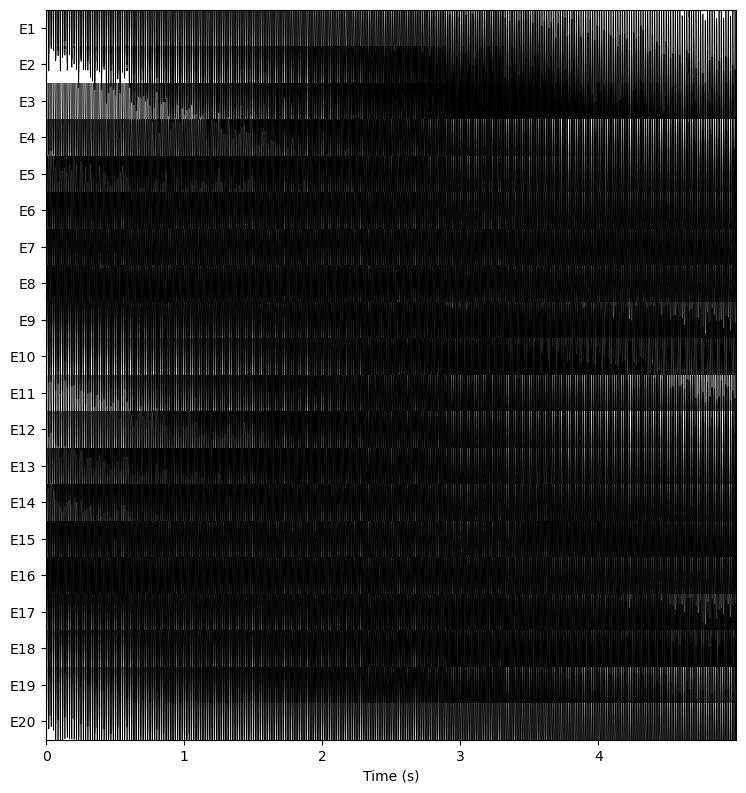

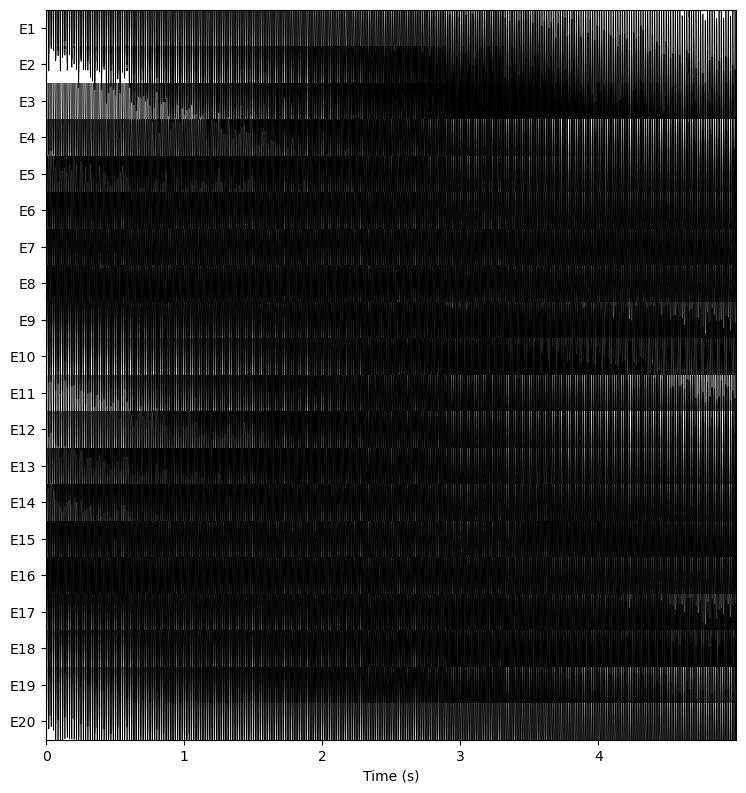

In [7]:
raw = mne.io.RawArray(data, info)
raw.plot(show_scrollbars=False, show_scalebars=False)

In [8]:
raw.set_eeg_reference('average', projection=True)

EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


<RawArray | 256 x 5000 (5.0 s), ~10.1 MB, data loaded>

In [9]:
raw.save("egi_raw.fif",overwrite=True)

Writing /home/zhibinz2/GitHub/MEG_EEG_Source_Localization/EEG_pipeline/egi_raw.fif
Closing /home/zhibinz2/GitHub/MEG_EEG_Source_Localization/EEG_pipeline/egi_raw.fif
[done]


In [11]:
# This will open a GUI to manually create a transformation matrix file
# mne.gui.coregistration()
# I have did this and save the file as egi_trans.fif in this directory